# Productive Numbers
What's your favorite prod?



Set-up code (ignore)

In [1]:
!pip install networkx matplotlib sympy 
! pip install ipywidgets==7.5.1 ipython_genutils

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import sympy
from sympy.ntheory import factorint
primes = list(sympy.primerange(1, 100))

def draw_white_dot(G, pos, ax=None):
    node_label = len(G.nodes) + 1
    G.add_node(0, pos=(pos[0], pos[1]))
    nx.draw_networkx_nodes(G, {0:pos}, nodelist=[0], node_color='white', node_size=500, edgecolors='black', ax=ax)
    return node_label

def draw_black_dot(G, pos, ax=None):
    node_label = len(G.nodes) + 1
    G.add_node(node_label, pos=(pos[0], pos[1]))
    nx.draw_networkx_nodes(G, {node_label:pos}, nodelist=[node_label], node_color='black', node_size=500, ax=ax)
    return node_label

def draw_tree(G, tree, pos=None, root_pos=(0, 0), ax=None):
    if pos is None:
        pos = {}
    
    if tree == 0:
        label = draw_white_dot(G, root_pos, ax=ax)
        pos[label] = root_pos
        return label

    n = len(tree)
    root_pos = (root_pos[0] + n//2, root_pos[1])
    root_label = draw_black_dot(G, root_pos,ax=ax)
    pos[root_label] = root_pos
    
    for i, child in enumerate(tree):
        j = i - n//2
        child_label = draw_tree(G, child, pos=pos, root_pos=(root_pos[0] + j, root_pos[1]-1), ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=[(root_label, child_label)],ax=ax)


    return root_label

def d_to_p(x):
    if x == 0: return 0
    if x == 1: return ()
    
    factors = factorint(x)
    
    # bit clunky. Could be improved if [] is infinitely long behind the scenes but always gets printed as short as possible
    max_prime = max(factors.keys())
    mp_index = primes.index(max_prime)
    y = [0] * (mp_index + 1)
    
    # key recursive step
    for p, e in factors.items():
        i = primes.index(p)
        y[i] = d_to_p(e)
    
    return tuple(y)

def d2tree(x, ax=None):
    G = nx.Graph()
    draw_tree(G, d_to_p(x), ax=ax)



interactive(children=(IntSlider(value=5, description='n:', max=50, min=1), Output()), _dom_classes=('widget-in…

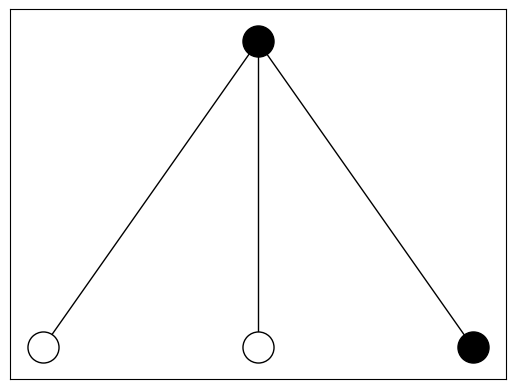

In [3]:
import ipywidgets as widgets
from IPython.display import display
 
def update_plot(n):
    d2tree(n)

slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description="n:")
widgets.interactive(update_plot, n=slider)

In [4]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)